# <center> Кластеризация изображений транспортных средств

## Постановка задачи

<center> <img src=https://i.ibb.co/t8DvkyB/smart-city-image-1.jpg align="right" width="300"/> </center>
<center> <img src=https://i.ibb.co/qYkWNVh/smart-city-image-3.jpg align="right" width="300"/> </center>


Один из ключевых проектов IntelliVision — Smart City/Transportation, система, обеспечивающая безопасность дорожного движения и более эффективную работу парковок. С помощью Smart City/Transportation можно контролировать сигналы светофоров и соблюдение ограничений скорости, определять виды транспортных средств, распознавать номерные знаки, считать автомобили и людей.

В основе всех перечисленных возможностей проекта лежит CV (Computer Vision, компьютерное зрение). Чтобы их реализовать, компания использует модели, для обучения которых применяются огромные размеченные датасеты с изображениями транспортных средств. Однако система работает в режиме реального времени и с каждым днём данных становится всё больше. Алгоритм нуждается в постоянной модернизации и должен учитывать множество факторов.

Для модификации и повышения эффективности системы Smart City/Transportation команде необходимо автоматизировать определение дополнительных параметров авто на изображении:

* тип автомобиля (кузова),
* ракурс снимка (вид сзади/спереди),
* цвет автомобиля,
* другие характеристики.

Также необходимо автоматизировать поиск выбросов в данных (засветы и блики на изображениях, изображения, на которых отсутствуют автомобили и т. д.).

К сожалению, у компании нет комплексной модели, которая могла бы одновременно находить на изображении автомобиль и определять все нужные параметры. Её нужно построить, однако многокомпонентная разметка новых данных по всем этим параметрам — очень трудозатратное занятие, которое стоит больших денег.

При решении задачи разметки данных у команды возникла гипотеза, которая нуждается в исследовании.


**Гипотеза:** разметку исходных данных можно эффективно провести с помощью методов кластеризации. 


**В чём идея?**

*Давайте будем использовать небольшой набор моделей свёрточных нейронных сетей, обученных на различных датасетах и решающих различные задачи от классификации изображений по цвету до классификации типов транспортных средств, пропустим нашу базу изображений через каждую модель, но возьмём не выходной результат модели, а только промежуточное представление признаков (дескриптор), полученное на свёрточных слоях сети.*

*Выполним такую операцию для всех изображений из набора данных, на основе полученных дескрипторов кластеризуем изображения, проинтерпретируем полученные кластеры и попробуем найти в них необходимую информацию.*

Теперь, когда мы обсудили гипотезу, перейдём к постановке задачи.

<center> <img src=https://i.ibb.co/hLcBpZF/2023-03-27-12-11-17.png align="right" width="500"/> </center>

У вас будет набор из 416 314 изображений транспортных средств различных типов, цветов и снятых с разных ракурсов.

Команда IntelliVision уже обработала свой набор данных с помощью нескольких моделей глубокого обучения (свёрточных нейронных сетей) и получила четыре варианта вектора признаков (дескрипторов) для каждого изображения.

**Ваша задача** — используя готовые дескрипторы, разбить изображения на кластеры и проинтерпретировать каждый из них. Для всех вариантов дескрипторов нужно применить несколько алгоритмов кластеризации и сравнить полученные результаты. Сравнивать можно на основе метрик, визуализаций плотностей кластеров и по тому, насколько хорошо интерпретируются кластеры.

Дополнительная подзадача — найти выбросы среди изображений. Это могут быть изображения плохого качества, изображения с бликами или изображения, на которых нет транспортных средств и т. д.

Бизнес-задача: исследовать возможность применения алгоритмов кластеризации для разметки новых данных и поиска выбросов.

Техническая задача для вас как для специалиста в Data Science: построить модель кластеризации изображений на основе дескрипторов, выделяемых с помощью различных архитектур нейронных сетей, проинтерпретировать полученные результаты и выбрать модель или комбинацию моделей, которая выделяет наиболее пригодные для интерпретации признаки.

**Ваши основные цели:**
1. Для каждого типа дескрипторов необходимо:
    * выполнить предобработку дескрипторов;
    * произвести кластеризацию изображений на основе их дескрипторов, подобрав алгоритм и параметры кластеризации;
    * сделать визуализацию полученных кластеров в 2D- или 3D-пространстве;
    * проинтерпретировать полученные кластеры — в паре предложений сформулировать, какие изображения попали в каждый из кластеров.
2. Сравнить между собой полученные кластеризации для каждого типа дескрипторов (по метрикам, визуализации и результатам интерпретации).
3. Выполнить автоматизированный поиск выбросов среди изображений на основе дескрипторов.
4. Дополнительная задача (не оценивается): попробовать воспользоваться смесью дескрипторов, полученных различными моделями, и проинтерпретировать полученные результаты.

**Примечание.** При выборе алгоритма кластеризации следует ориентироваться на внутренние метрики, а именно на индекс Калински — Харабаса (`calinski_harabasz_score`) и индекс Дэвиса — Болдина (`davies_bouldin_score`), а также на интерпретируемость кластеров и визуализацию.

## Данные и их описание

Исходная папка с данными имеет следующую структуру:

```
IntelliVision_case
├─descriptors
    └─efficientnet-b7.pickle
    └─osnet.pickle
    └─vdc_color.pickle
    └─vdc_type.pickle
├─row_data
    └─veriwild.zip
├─images_paths.csv 
```

Давайте разберёмся в ней:

* В папке `descriptors` содержатся дескрипторы, полученные для каждого из изображений с помощью соответствующих нейронных сетей, в формате numpy-массивов, сохранённых в файлах pickle:
    * `efficientnet-b7.pickle` — дескрипторы, выделенные моделью классификации с архитектурой EfficientNet версии 7. Эта модель является свёрточной нейронной сетью, предобученной на на датасете ImageNet, в котором содержатся изображения более 1000 различных классов. Эта модель при обучении не видела датасета veriwiId. 

    * `osnet.pickle` — дескрипторы, выделенные моделью OSNet, обученной для детектирования людей, животных и машин. Модель не обучалась на исходном датасете veriwiId.

    * `vdc_color.pickle` — дескрипторы, выделенные моделью регрессии для определения цвета транспортных средств в формате RGB. Частично обучена на исходном датасете veriwild.
    
    * `vdc_type.pickle` — дескрипторы, выделенные моделью классификации транспортных средств по типу на десяти классах. Частично обучена на исходном датасете veriwild.

* В папке `row_data` содержится zip-архив с исходными изображениями автомобилей. Распакуйте его содержимое в папку row_data. Архив содержит десять папок с изображениями, пронумерованных от 1 до 10. Каждая папка содержит подпапки, обозначенные пятизначными цифрами, например 36191. 

В каждой из таких подпапок содержатся фотографии одного конкретного автомобиля с разных ракурсов, снятые с помощью дорожных видеокамер.

* В файле `images_paths.csv` представлен список из полных путей до изображений. Он пригодится вам при анализе изображений, попавших в определённый кластер.


Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np

# %matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

import pickle

import cupy as cp

from cuml import UMAP, TSNE
from cuml.decomposition import PCA
from cuml.preprocessing import StandardScaler, MinMaxScaler
from cuml.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

## 1. Знакомство со структурой данных

Прочитайте numpy-массивы из предоставленных pickle-файлов.

**Примечание** Для удобства дальнейшей работы вы можете составить четыре DataFrame с путями до изображений и соответствующими им дескрипторами.

Посмотрите на размерности каждой из четырёх заданных матриц и сравните использованные модели глубокого обучения по размерностям выходных дескрипторов изображений. 


### Решение:

Организуем класс `DataLoader` для загрузки требуемого датасета (чтобы не перегружать оперативную память или память видеокарты)

Затем поочерёдно откроем датасеты для получения информации о них.

In [2]:
class DataLoader():
    def __init__(
        self,
        descriptor_names = [
            'efficientnet-b7', 'osnet', 'vdc_color', 'vdc_type'
        ],
        descriptor_folder = 'data/descriptors/',
        image_paths = 'data/images_paths.csv',
        verbose:bool = True,
    ):
        """Class for data loading (descriprots and image_paths)

        Args:
            descriptor_names (list): List of descriptor names. Defaults to ['efficientnet-b7', 'osnet', 'vdc_color', 'vdc_type'].
            descriptor_folder (str, optional): Folder where descriptors kept. Defaults to 'data/descriptors/'.
            image_paths (str, optional): Path to "image_paths" dataset. Defaults to 'data/images_paths.csv'.
            verbose (bool): Print additional messages. Defaults to True
            
        """
        self._descriptor_folder = descriptor_folder
        self.descriptor_names = descriptor_names
        self.full_image_paths = pd.read_csv(image_paths)
        self._descriptor = None
        self._descriptor_name = None
        self._image_paths = None
        self.verbose = verbose
        if self.verbose:
            # Show image paths details
            print('Shape of "image paths":', self.full_image_paths.shape)
            display(self.full_image_paths.head())
    
    def __del__(self):
        del self._descriptor
    
    def _load_full_descriptor(self, name:str, dtype:str='cupy'):
        """Load descriptor with stated "name" in RAM or GPU (see "dtype")

        Args:
            name (str): Name of the descriptor to load
            dtype (str): Select type of data:
            - 'numpy' - numpy.ndarray format (keep data on RAM);
            - 'cupy' - cupy.ndarray format (keep data on GPU).
            Defaults to 'cupy'.

        Raises:
            TypeError: If data type is not in ["numpy", "cupy"]
        """
        with open(
            self._descriptor_folder + name + '.pickle',
            'rb' # read binary
        ) as pkl_file:
            self._descriptor = pickle.load(pkl_file)
            self._descriptor_name = name
            if dtype.strip().lower() == 'numpy':
                pass
            elif dtype.strip().lower() == 'cupy':
                self._descriptor = cp.asarray(self._descriptor)
            else:
                raise TypeError('Wrong data_type. Only "numpy" and "cupy" allowed')
        self._image_paths = self.full_image_paths
    
    
    def load_descriptor(
        self, 
        name:str,
        dtype:str='cupy',
        data_fraction:float=1.0,
        random_state:int=None,
    ):
        """Load random part of the descriptor with stated "name" in RAM or GPU (see "dtype")
        and with setted fraction. If data_fraction==1.0, load full descriptor.

        Args:
            name (str): Name of the descriptor to load
            dtype (str): Select type of data:
            - 'numpy' - numpy.ndarray format (keep data on RAM);
            - 'cupy' - cupy.ndarray format (keep data on GPU).
            Defaults to 'cupy'.
            data_fraction (float): Fraction of the descriptor to load. Defaults to 1.0.
            random_state (int, optional): Set random state for the random generator. Defaults to None.

        Raises:
            ValueError: Data fraction must be in the range [0, 1]
        """
        if data_fraction < 0.0 or data_fraction > 1.0:
            raise ValueError('data_fraction must be in the range [0, 1]')
        
        self._load_full_descriptor(name, dtype)
        
        if data_fraction == 1.0:
            if self.verbose:
                print('All dataset downloaded')
            return
        
        # Get required row count
        row_cnt = np.ceil(
            data_fraction * self._descriptor.shape[0]
        ).astype(int)
        
        rng = np.random.default_rng(random_state)
        indexes = rng.choice(
            self._descriptor.shape[0], 
            size=row_cnt,
            replace=False
        )
        indexes.sort()
        
        # Save active descriptor and related image paths
        self._descriptor = self._descriptor[indexes,:]
        self._image_paths = self.image_paths.iloc[indexes,:]
        
    
    @property
    def descriptor(self):
        """Return active descriptor and its name

        Returns:
            typle: (descriptor name, descriptor)
        """
        return (self._descriptor_name, self._descriptor)
    
    
    @property
    def image_paths(self):
        return self._image_paths
    
    
    def print_descriptor_info(self):
        """Print active descriptor name and shape
        """
        descriptor_name, descriptor = self.descriptor
        print(f'Descriptor "{descriptor_name}":')
        print(f'\tShape: {descriptor.shape}')



loader = DataLoader()
# Load datasets to show info
for descriptor in loader.descriptor_names:
    loader.load_descriptor(descriptor, dtype='numpy')
    loader.print_descriptor_info()

Shape of "image paths": (416314, 1)


,paths
0,veriwild\1\00001\000001.jpg
1,veriwild\1\00001\000002.jpg
2,veriwild\1\00001\000003.jpg
3,veriwild\1\00001\000004.jpg
4,veriwild\1\00001\000005.jpg


All dataset downloaded
Descriptor "efficientnet-b7":
	Shape: (416314, 2560)
All dataset downloaded
Descriptor "osnet":
	Shape: (416314, 512)
All dataset downloaded
Descriptor "vdc_color":
	Shape: (416314, 128)
All dataset downloaded
Descriptor "vdc_type":
	Shape: (416314, 512)


**ВЫВОД:**

Датасет с путями, а также все дескрипторы, содержат одинаковое количество строк: 416314.
Датасет с путями содержит одну колонку 'paths', содержащую относительный путь до картинок.

Для этих картинок имеются четыре дескриптора (дескриптор - векторизованный выход после сверточных слоёв).
Самый большой дескриптор имеет модель классификации с архитектурой **EfficientNet** версии 7.
Следом за ней (по размеру дескриптора) идут модель **OSNet** и модель классификации транспортных средств по типу **'vdc_type'**.
Меньше всего размер дескриптора, отвечающего за цвет транспортного средства **'vdc_color'**.


## 2. Преобразование, очистка и анализ данных

Признаки, найденные с помощью некоторых моделей, исчисляются тысячами, что довольно много, учитывая общее количество наблюдений.

Как вы понимаете, производить кластеризацию на таком большом количестве признаков, которые были сформированы исходными моделями глубокого обучения, довольно сложно и затратно по времени. К тому же, многие признаки, найденные моделями на изображениях, могут быть сильно скоррелированы между собой.

Понизьте размерность исходных дескрипторов с помощью соответствующих методов. Можно уменьшить размерность входных данных до 100 или 200 признаков — этого будет достаточно, чтобы произвести кластеризацию, однако рекомендуем вам самостоятельно подобрать необходимое количество компонент в новом пространстве признаков.

Также позаботьтесь о масштабе признаков, воспользовавшись стандартизацией и нормализацией. После кластеризации определите, какой вариант масштабирования более успешен для каждого варианта дескрипторов.


### Решение

Подберём необходимое количество компонент для каждого дескриптора по объясняемому разбросу (explained_variance_ratio_) в предположении, что требуется минимум от 50 до 75 % объяснения данных.

Брать максимум мы не будем ввиду ограничений памяти в GPU.

In [3]:
for name in loader.descriptor_names:
    # Load only a half of the data
    loader.load_descriptor(
        name, 
        random_state=42,
        data_fraction=0.5
    )
    descriptor_name, descriptor = loader.descriptor

    print(f'ДЕСКРИПТОР "{descriptor_name}"')

    for n_components in np.arange(50, 400, 50):
        if n_components > descriptor.shape[1]:
            print('Достигнут предел по количеству признаков')
            break
        pca_cu = PCA(n_components=n_components, random_state=42)
        effnt_cu = pca_cu.fit_transform(descriptor)
        print('Количество признаков:', n_components,
            f'\t"Объясняемый" разброс: {pca_cu.explained_variance_ratio_.sum():.3f}'
        )
    print()

ДЕСКРИПТОР "efficientnet-b7"
Количество признаков: 50 	"Объясняемый" разброс: 0.343
Количество признаков: 100 	"Объясняемый" разброс: 0.466
Количество признаков: 150 	"Объясняемый" разброс: 0.557
Количество признаков: 200 	"Объясняемый" разброс: 0.628
Количество признаков: 250 	"Объясняемый" разброс: 0.685
Количество признаков: 300 	"Объясняемый" разброс: 0.730
Количество признаков: 350 	"Объясняемый" разброс: 0.762

ДЕСКРИПТОР "osnet"
Количество признаков: 50 	"Объясняемый" разброс: 0.846
Количество признаков: 100 	"Объясняемый" разброс: 0.925
Количество признаков: 150 	"Объясняемый" разброс: 0.955
Количество признаков: 200 	"Объясняемый" разброс: 0.970
Количество признаков: 250 	"Объясняемый" разброс: 0.980
Количество признаков: 300 	"Объясняемый" разброс: 0.987
Количество признаков: 350 	"Объясняемый" разброс: 0.992

ДЕСКРИПТОР "vdc_color"
Количество признаков: 50 	"Объясняемый" разброс: 0.870
Количество признаков: 100 	"Объясняемый" разброс: 0.963
Достигнут предел по количеству при

Создадим класс `DataKeeper` для хранения дескрипторов с уменьшенным количеством признаков (с помощью метода главных компонент), а также их масштабированных версий (StandardScaler и MinMacScaler)

Примем следующие значения количества признаков в PCA из условия, что "объясняемый" разброс не увеличивается значительно с последующим увеличением (см. атрибут `n_components_dict` в классе `DataKeeper`):

In [3]:

class DataKeeper():
    def __init__(
        self,
        n_components_dict:dict = {
            "efficientnet-b7": 250,
            "osnet": 150,
            "vdc_color": 100,
            "vdc_type": 150,
        },
        loader_verbose = False,
    ):
        """DataKeeper keeps active PCA-reduced descriptor and its Standard- and Norm- scaled version

        Args:
            n_components_dict (dict): Number of PCA-components for each dataframe. Defaults to {
                    "efficientnet-b7": 250, 
                    "osnet": 150, 
                    "vdc_color": 100, 
                    "vdc_type": 150, 
                }.
            loader_verbose (bool): Print additional information. Defaults to False.
        """
        self.loader = DataLoader(verbose=loader_verbose)
        self.n_components_dict = n_components_dict
        
        self.del_data() # Prepare empty data variables
    
    
    def del_data(self):
        """Clean data variables
        """
        # descriptor_PCA
        self.descriptor_PCA = None
        self.pca:PCA = None
        
        self.descriptors_scaled = {}
        
        # StandardScaler
        # self.descriptor_std = None
        self.std_scaler = None
        
        # MinMaxScaler
        # self.descriptor_norm = None
        self.norm_scaler = None
        
    
    def get_PCA_descriptor(
        self,
        random_state:int=None,
    ):
        """Get descriptor with reduced features (by PCA)

        Args:
            random_state (int): Random state for the PCA. Defaults to None.
        """
        self.pca = PCA(
            n_components=self.n_components_dict[
                self.loader._descriptor_name
            ], 
            random_state=random_state
        )
        self.descriptor_PCA = self.pca.fit_transform(
            self.loader._descriptor
        )
        # Free space of the original desciptor
        self.loader._descriptor = None
        
    
    def load_descriptor_PCA(
        self, 
        name:str,
        data_fraction:float=1.0,
        random_state:int=None,
    ):
        """Load descriptor by self.loader.load_descriptor and get PCA

        Args:
            name (str): Name of the descriptor to load
            data_fraction (float): Fraction of the descriptor to load. Defaults to 1.0.
            random_state (int, optional): Set random state for the random generator and PCA. Defaults to None.
        """
        self.loader.load_descriptor(
            name, 
            data_fraction=data_fraction, 
            random_state=random_state
        )
        self.get_PCA_descriptor(random_state=random_state)
 
   
    def get_std_scaled_descriptor(self):
        """Get Standard scaled data
        """
        self.std_scaler = StandardScaler()
        self.descriptors_scaled['standard'] = self.std_scaler.fit_transform(
            self.descriptor_PCA
        )
    
    
    def get_norm_scaled_descriptor(self):
        """Get MinMax scaled data
        """
        self.norm_scaler = MinMaxScaler()
        self.descriptors_scaled['norm'] = self.norm_scaler.fit_transform(
            self.descriptor_PCA
        )
    
    
    def get_scaled_descriptors(
        self,
    ):
        """Get Norm- and Standard- scaled data
        """
        self.get_norm_scaled_descriptor()
        self.get_std_scaled_descriptor()

Рассмотрим работу PCA, MinMaxScaler и StandardScaler на примере "первого" в списке дескриптора:

In [4]:
if 'loader' in locals():
    del loader # Remove data loader to free GPU storage
cp._default_memory_pool.free_all_blocks()

data_keeper = DataKeeper()

data_keeper.load_descriptor_PCA(
    name=data_keeper.loader.descriptor_names[0],
    data_fraction=0.5,
    random_state=42,
)
data_keeper.get_scaled_descriptors()

print(f'Normalized descriptor: {data_keeper.descriptors_scaled["norm"].shape}')
print(f'Standartized descriptor: {data_keeper.descriptors_scaled["standard"].shape}')

Normalized descriptor: (208157, 250)
Standartized descriptor: (208157, 250)


В следующем разделе будет выбран наилучший метод масштабирования.

## 3. Моделирование и оценка качества модели

### 3.1. Кластеризация изображений

После предобработки исходных данных произведите кластеризацию для каждого набора дескрипторов.

Для решения задачи используйте несколько различных методов, подобрав оптимальное количество кластеров для каждого метода и варианта дескрипторов.

В качестве метрики для подбора оптимального количества кластеров используйте внутренние меры индекс Калински — Харабаса (`calinski_harabasz_score`) и индекс Дэвиса — Болдина (`davies_bouldin_score`).

Рекомендуем вынести код для построения моделей кластеризации и подбора их параметров в отдельную функцию, чтобы не множить одинаковый код для четырёх случаев дескрипторов.

**Примечание.** Поскольку исходных данных много, могут возникнуть проблемы с оперативной памятью и скоростью работы таких алгоритмов, как K-Means. Вместо стандартного алгоритма K-Means можно воспользоваться реализацией MiniBatchKMeans. 

**Примечание.** Постарайтесь написать чистый код, максимально уменьшая количество дублирующихся участков.

### Решение

Для начала применим алгоритмы, требующие явно задавать количество кластеров.
При этом подберём оптимальное количество кластеров исходя из индекса Калински-Харабаса (задача максимизации) и индекса Дэвиса - Болдина (задача минимизации).

In [6]:
cluster_classes = [KMeans, AgglomerativeClustering]
n_clusters_arr = np.arange(2, 31)

cluster_results = []

for descriptor_name in data_keeper.loader.descriptor_names:
    print(f'ДЕСКРИПТОР {descriptor_name}')
    # Load descriptor
    data_keeper.load_descriptor_PCA(
        name=descriptor_name,
        data_fraction=0.5,
        random_state=42,
    )
    data_keeper.get_scaled_descriptors()
    
    for cluster_class in cluster_classes:
        print(f'Модель кластеризации: {cluster_class.__name__}')
        for scaler_name in data_keeper.descriptors_scaled:
            print(f'Метод масштабирования: {scaler_name}')
            for n_clusters in n_clusters_arr:
                # Init clusterization model with curren number of clusters
                cluster_model = cluster_class(n_clusters=n_clusters)
                cluster_model.fit(data_keeper.descriptors_scaled[scaler_name])
                ch_score = calinski_harabasz_score(
                    data_keeper.descriptors_scaled[scaler_name].get(), 
                    cluster_model.labels_.get()
                )
                db_score = davies_bouldin_score(
                    data_keeper.descriptors_scaled[scaler_name].get(), 
                    cluster_model.labels_.get()
                )
                
                cluster_results.append(
                    {
                    'descriptor': descriptor_name,
                    'cluster_class': cluster_class.__name__,
                    'scaler': scaler_name,
                    'n_clusters': n_clusters,
                    'calinski_harabasz_score': ch_score,
                    'davies_bouldin_score': db_score
                    }
                )
            print('DONE!')
        print()
    print()
    print()

cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df.to_csv('data/clusterization_scores.csv', index=False)
cluster_results_df.head()

ДЕСКРИПТОР efficientnet-b7
Модель кластеризации: KMeans
Метод масштабирования: norm
DONE!
Метод масштабирования: standard
DONE!

Модель кластеризации: AgglomerativeClustering
Метод масштабирования: norm
DONE!
Метод масштабирования: standard
DONE!



ДЕСКРИПТОР osnet
Модель кластеризации: KMeans
Метод масштабирования: norm
DONE!
Метод масштабирования: standard
DONE!

Модель кластеризации: AgglomerativeClustering
Метод масштабирования: norm
DONE!
Метод масштабирования: standard
DONE!



ДЕСКРИПТОР vdc_color
Модель кластеризации: KMeans
Метод масштабирования: norm
DONE!
Метод масштабирования: standard
DONE!

Модель кластеризации: AgglomerativeClustering
Метод масштабирования: norm
DONE!
Метод масштабирования: standard
DONE!



ДЕСКРИПТОР vdc_type
Модель кластеризации: KMeans
Метод масштабирования: norm
DONE!
Метод масштабирования: standard
DONE!

Модель кластеризации: AgglomerativeClustering
Метод масштабирования: norm
DONE!
Метод масштабирования: standard
DONE!





,descriptor,cluster_class,scaler,n_clusters,calinski_harabasz_score,davies_bouldin_score
0,efficientnet-b7,KMeans,norm,2,1.770633,0.744893
1,efficientnet-b7,KMeans,norm,3,1.607793,0.798016
2,efficientnet-b7,KMeans,norm,4,316.739597,7.763071
3,efficientnet-b7,KMeans,norm,5,235.344028,6.611312
4,efficientnet-b7,KMeans,norm,6,323.867384,7.066530


- Индекс Калински — Харабаса показывает, насколько кластеры плотны и хорошо разделены (чем выше тем лучше).
- Индекс Дэвиса — Болдина показывает среднюю "схожесть" между кластерами (чем меньше, тем лучше)

Визуализируем полученные результаты.

In [5]:
cluster_results_df = pd.read_csv('data/clusterization_scores.csv')

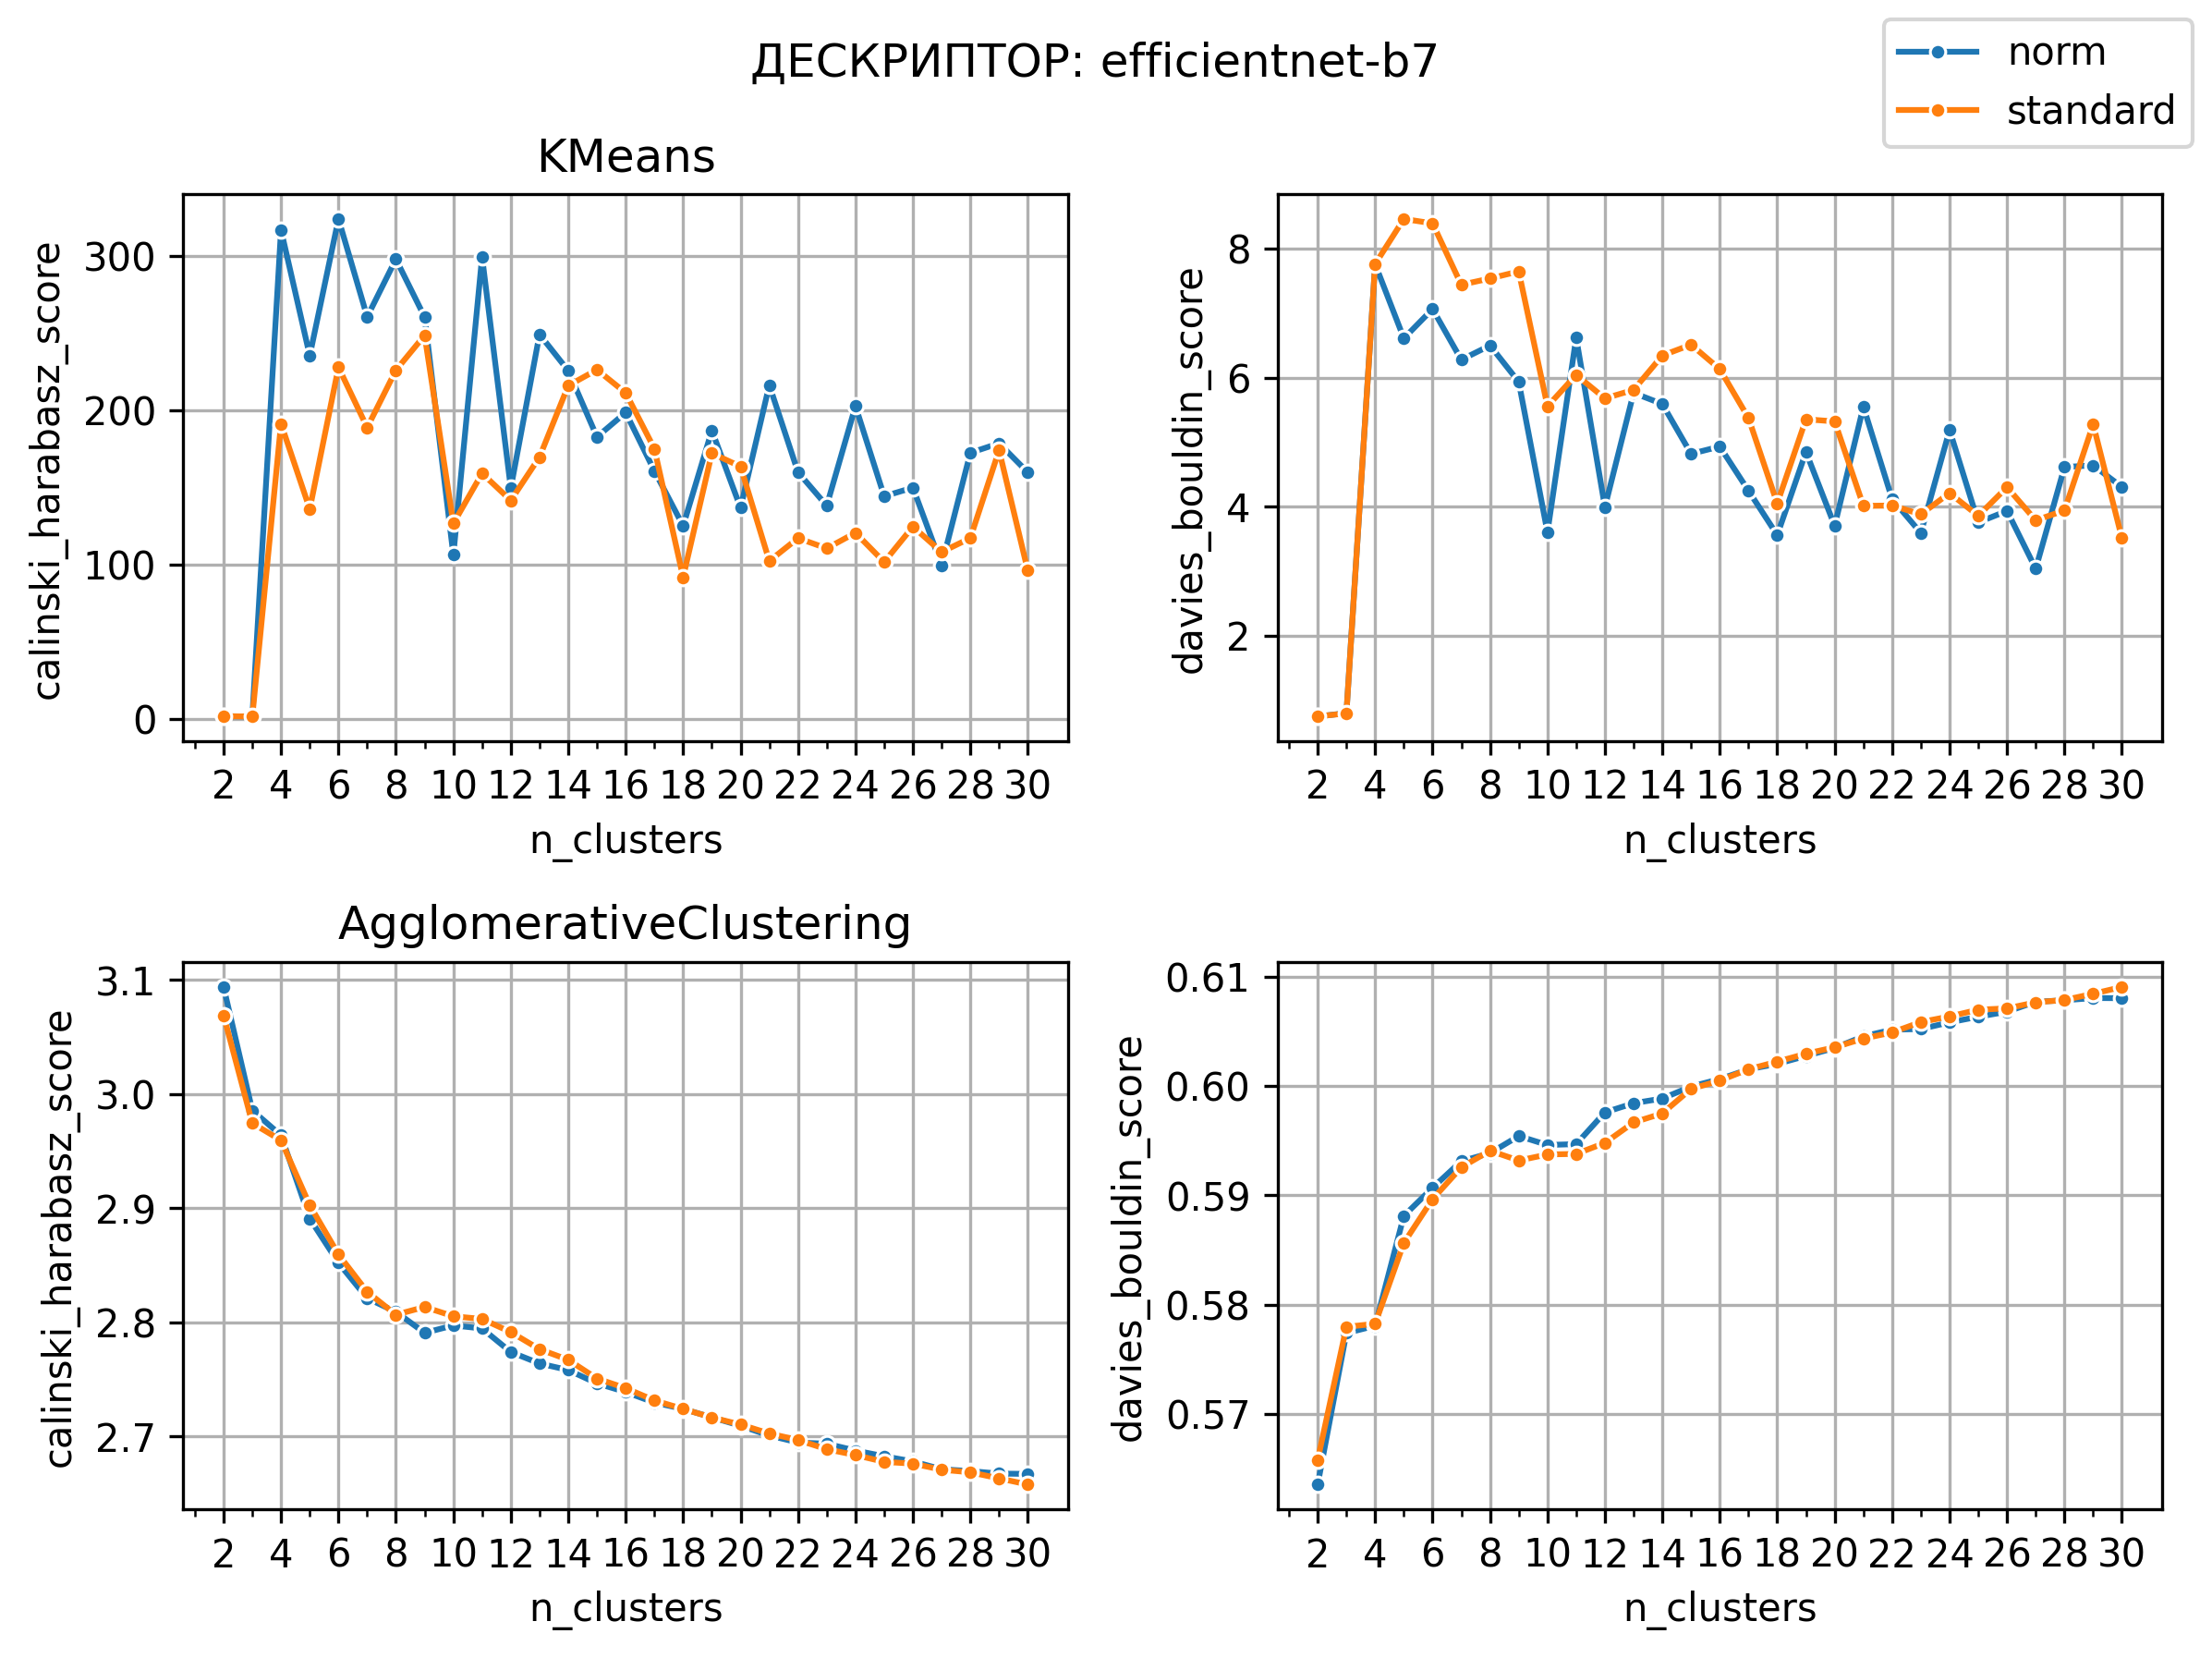

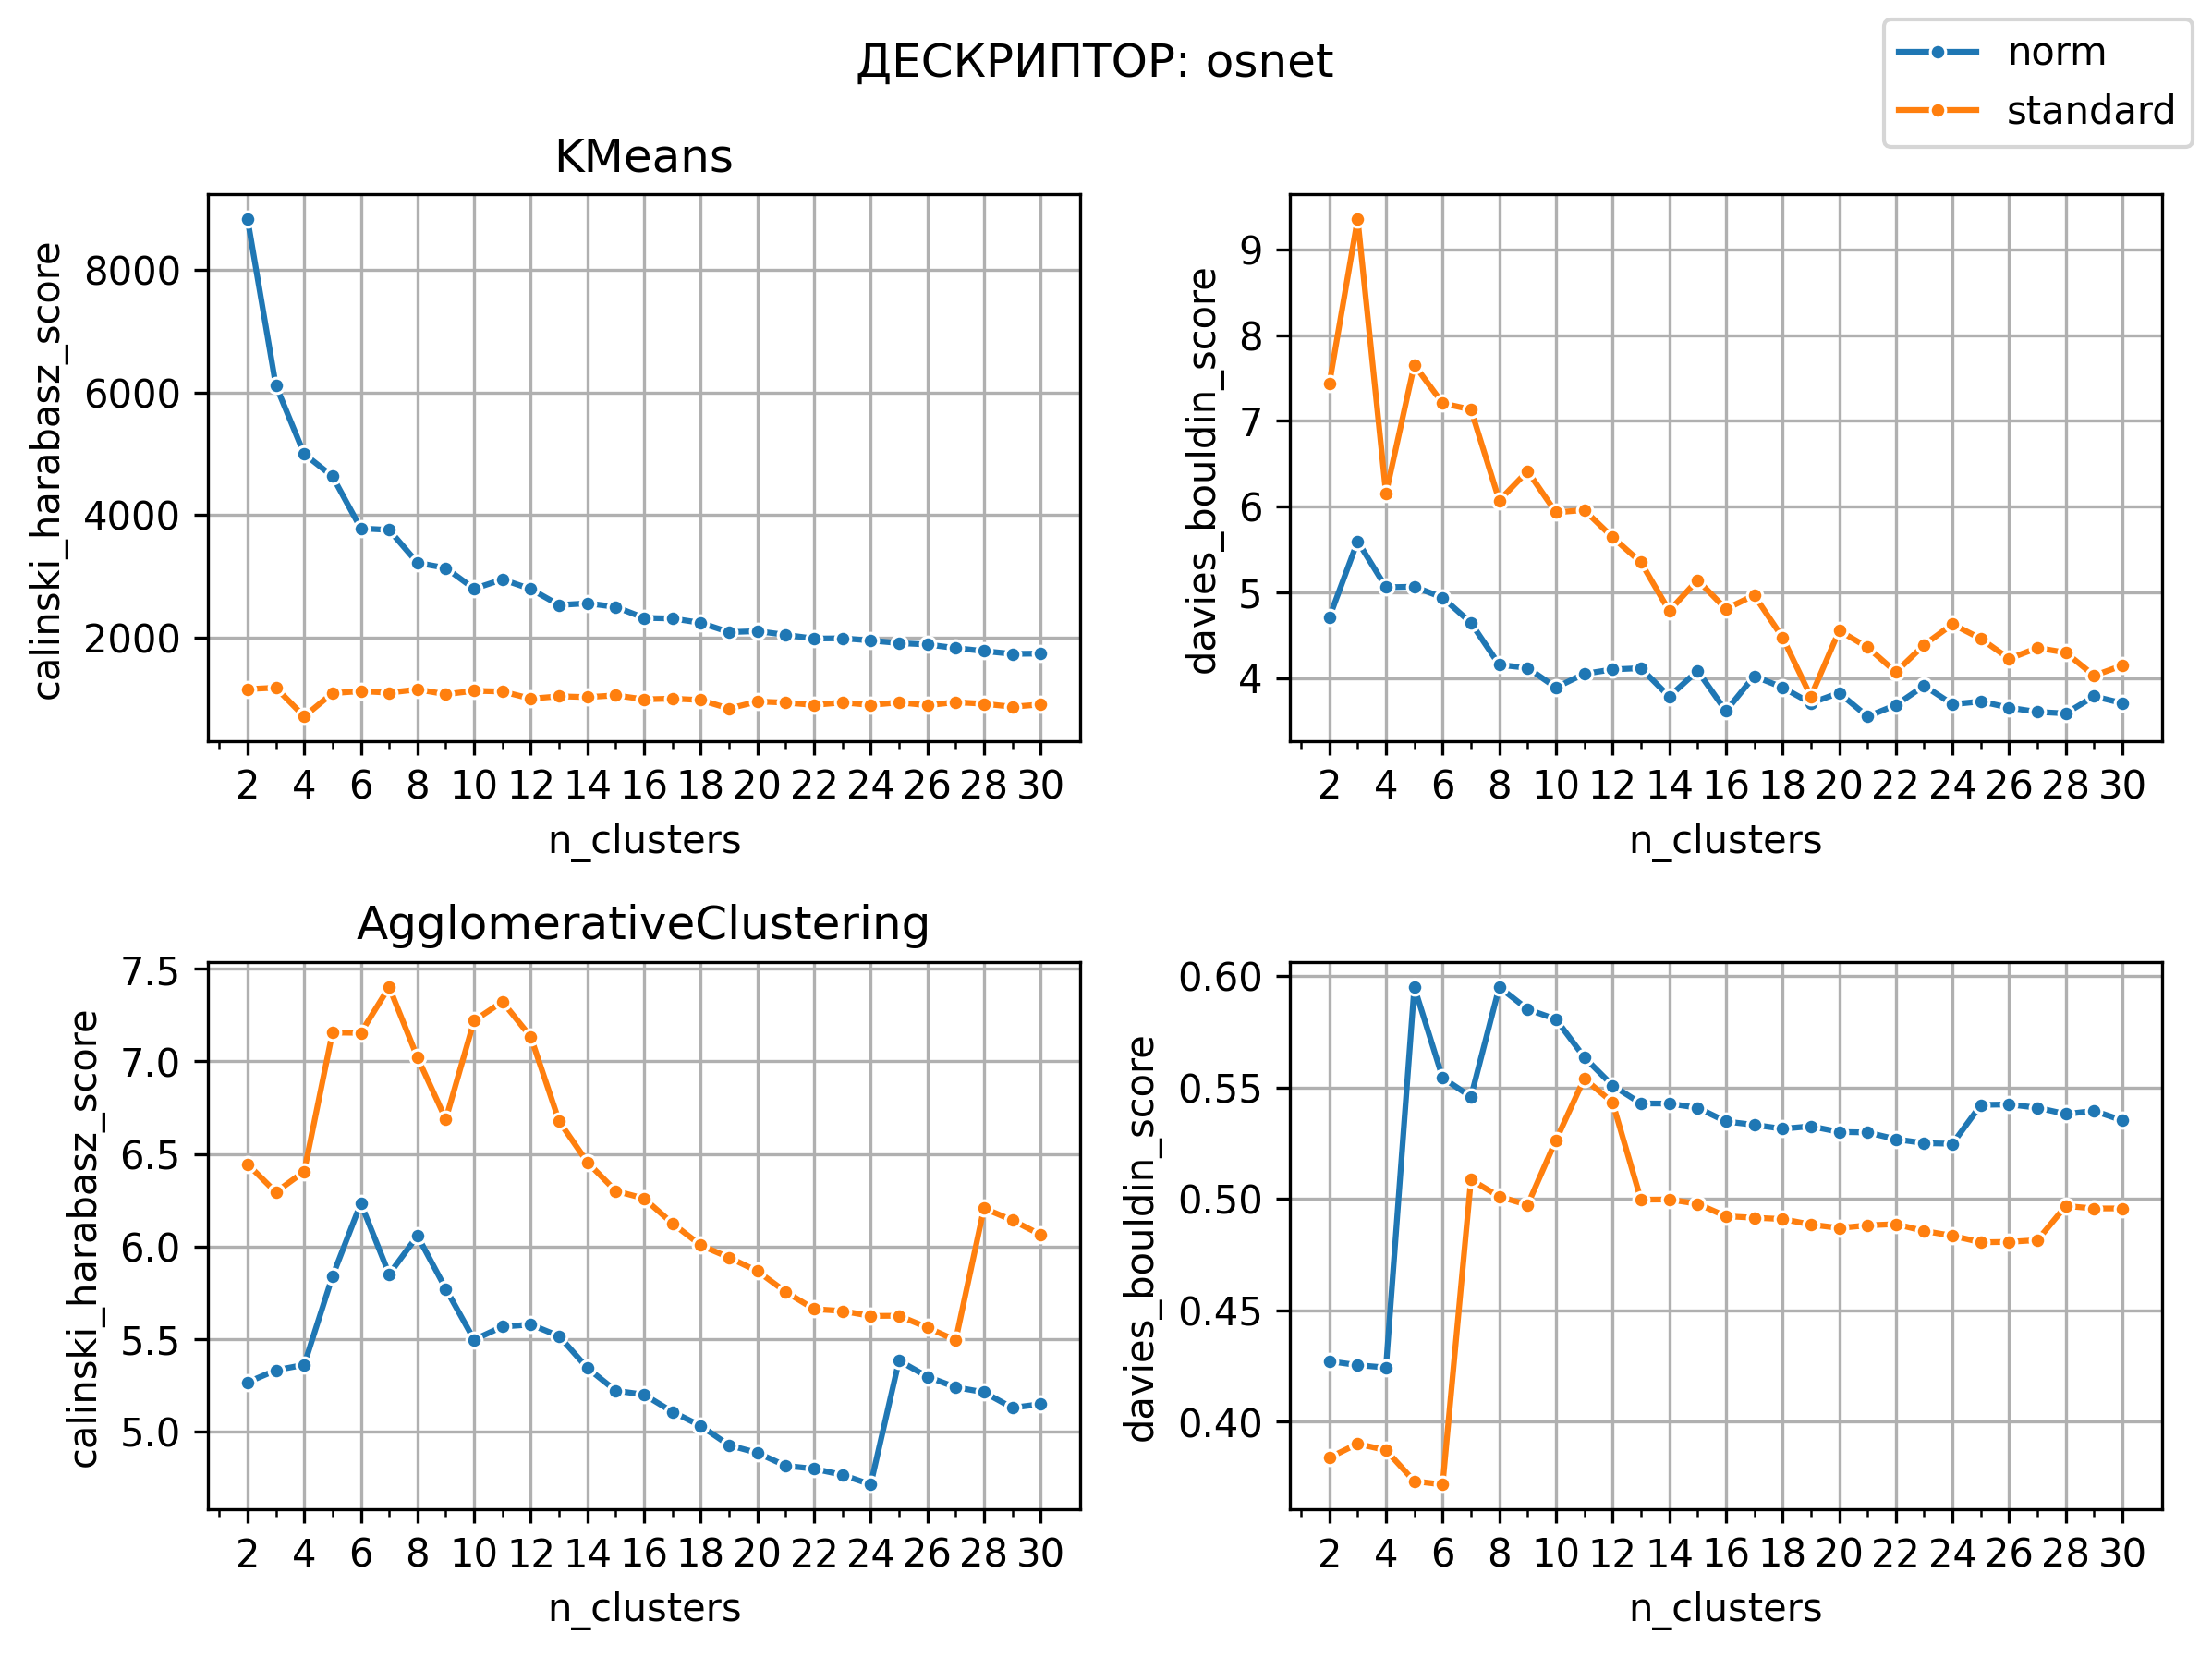

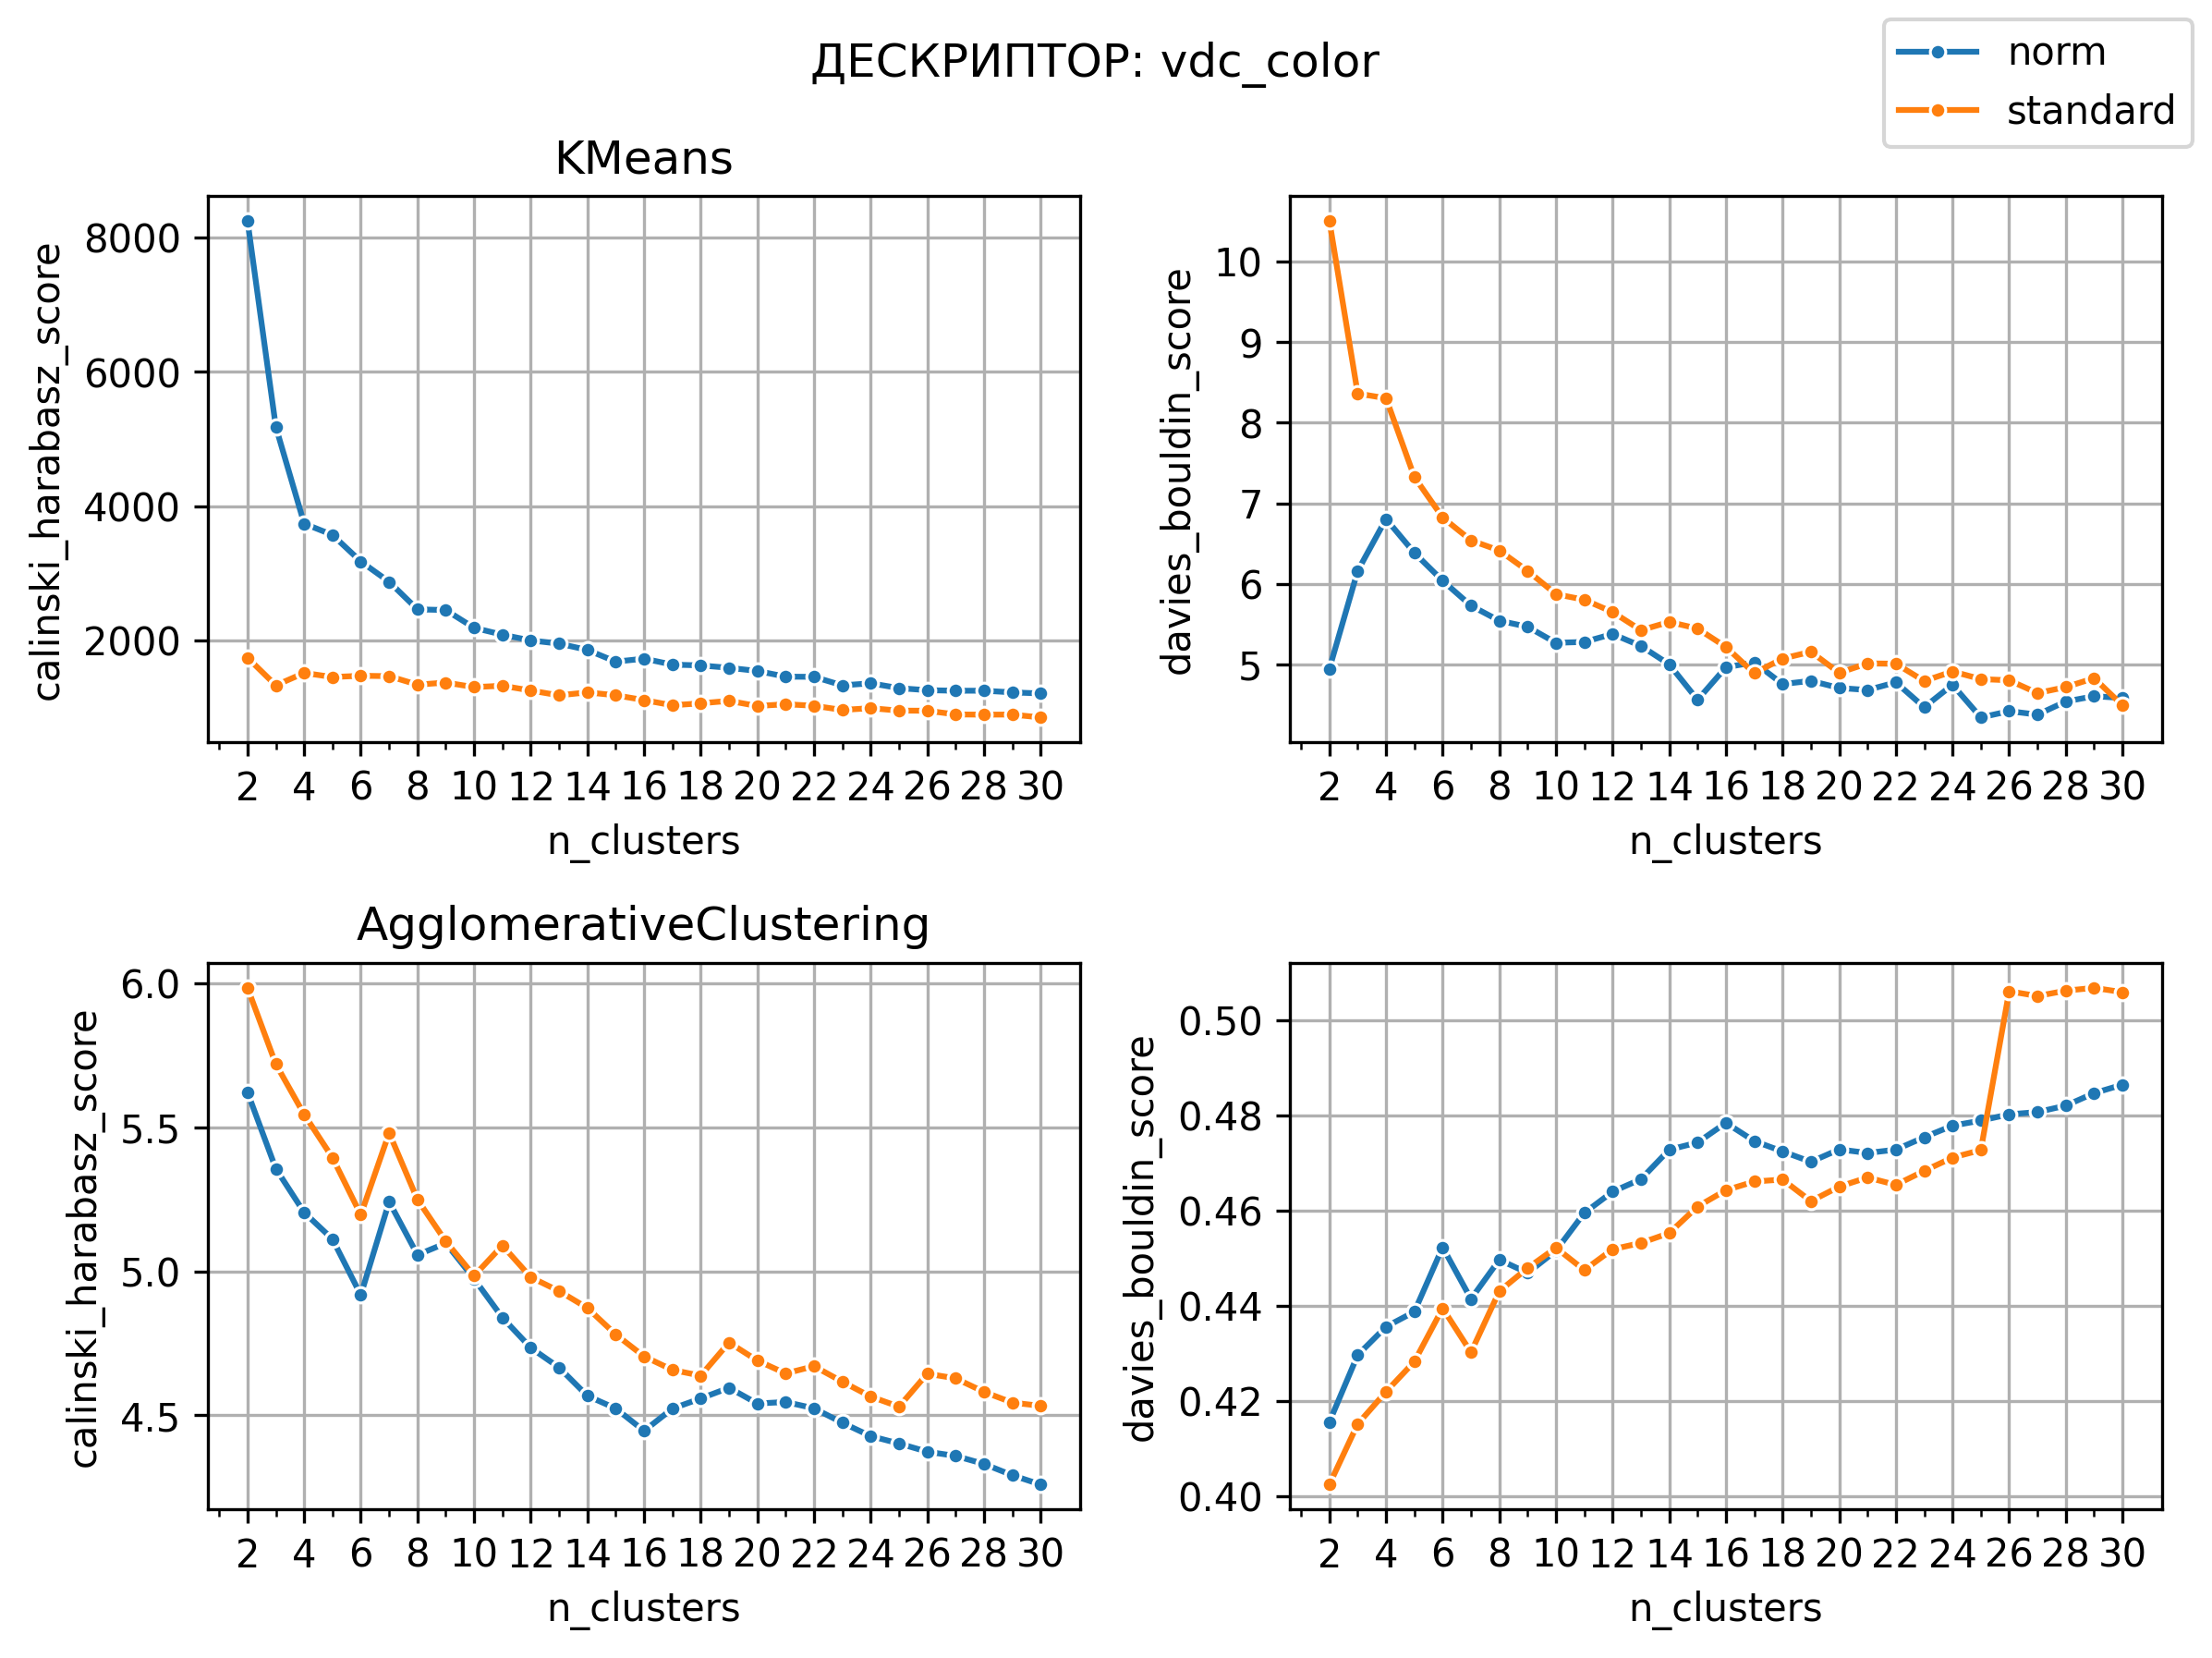

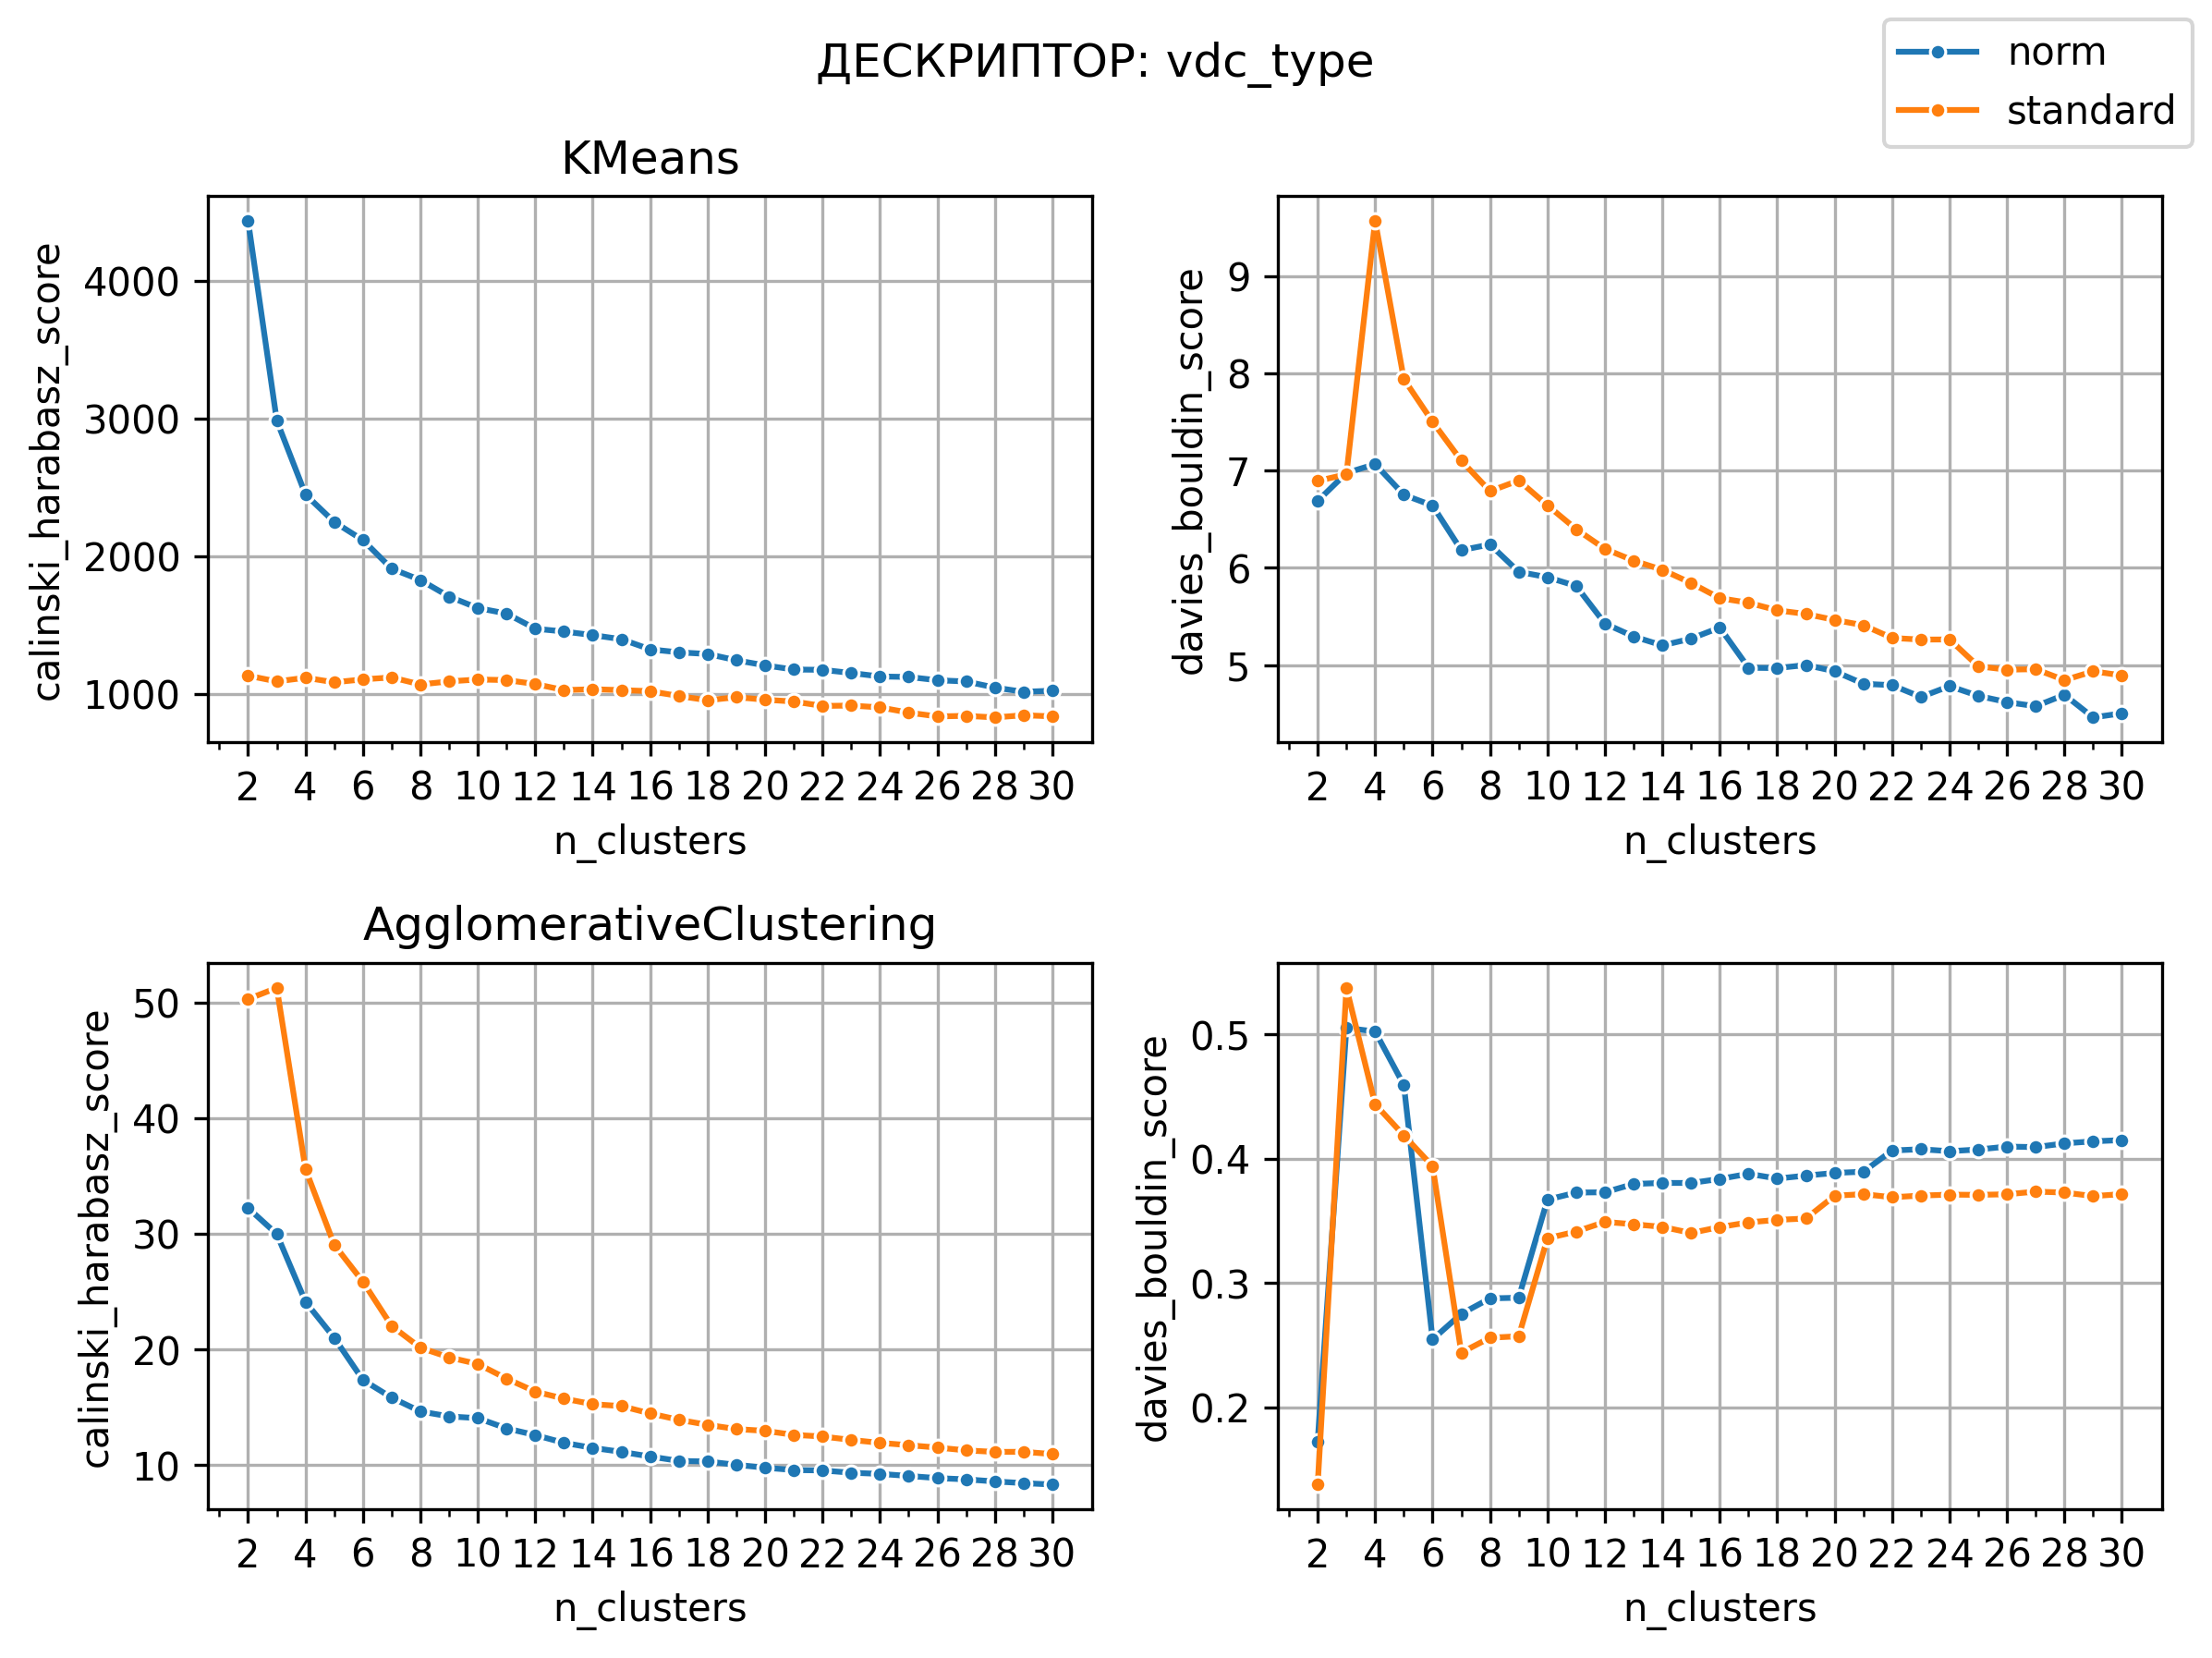

In [11]:
for descriptor in cluster_results_df['descriptor'].unique():
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    for i, cluster_class in enumerate(
        cluster_results_df['cluster_class'].unique()
    ): 
        data = cluster_results_df[
            (cluster_results_df['descriptor'] == descriptor) &
                (cluster_results_df['cluster_class'] == cluster_class)
        ]
        
        for j, score in enumerate([
            'calinski_harabasz_score', 'davies_bouldin_score'
        ]):
            sns.lineplot(
                data, 
                x='n_clusters', 
                y=score, 
                hue='scaler',
                marker='o',
                markersize=4,
                ax=axes[i][j],
            )
        
        axes[i][0].set_title(f'{cluster_class}')
        
    # Setup all axes
    for ax in axes.flat:
        ax.set_xticks(np.arange(2, 31, 2))
        ax.set_xticks(np.arange(1, 31), minor=True)
        ax.grid()
        ax.get_legend().remove()
    
    lines_labels = axes[1][1].get_legend_handles_labels()
    lines, labels = lines_labels
    fig.legend(lines, labels)
    
    fig.suptitle(f'ДЕСКРИПТОР: {descriptor}')
    plt.tight_layout()

**ДЕСКРИПТОР efficientnet-b7**:
- KMeans: 
    - наилучшее масштабирование: "norm"
    - наилучшее число кластеров по метрике Калински — Харабаса: 6
    - наилучшее число кластеров по метрике Дэвиса — Болдина: 27
- AgglomerativeClustering: 
    - наилучшее масштабирование: "standard"
    - наилучшее число кластеров по метрике Калински — Харабаса: 2
    - наилучшее число кластеров по метрике Дэвиса — Болдина: 2

**ДЕСКРИПТОР osnet**:
- KMeans: 
    - наилучшее масштабирование: "norm"
    - наилучшее число кластеров по метрике Калински — Харабаса: 2
    - наилучшее число кластеров по метрике Дэвиса — Болдина: 21
- AgglomerativeClustering: 
    - наилучшее масштабирование: "standard"
    - наилучшее число кластеров по метрике Калински — Харабаса: 7
    - наилучшее число кластеров по метрике Дэвиса — Болдина: 6

**ДЕСКРИПТОР vdc_color**:
- KMeans: 
    - наилучшее масштабирование: "norm"
    - наилучшее число кластеров по метрике Калински — Харабаса: 2
    - наилучшее число кластеров по метрике Дэвиса — Болдина: 25
- AgglomerativeClustering: 
    - наилучшее масштабирование: "standard"
    - наилучшее число кластеров по метрике Калински — Харабаса: 2
    - наилучшее число кластеров по метрике Дэвиса — Болдина: 2

**ДЕСКРИПТОР vdc_type**:
- KMeans: 
    - наилучшее масштабирование: "norm"
    - наилучшее число кластеров по метрике Калински — Харабаса: 2
    - наилучшее число кластеров по метрике Дэвиса — Болдина: 29
- AgglomerativeClustering: 
    - наилучшее масштабирование: "standard"
    - наилучшее число кластеров по метрике Калински — Харабаса: 3
    - наилучшее число кластеров по метрике Дэвиса — Болдина: 2

Перейдём теперь к DBSCAN и HDBSCAN

In [13]:
dbscan = DBSCAN(min_pts=100, eps=20)
dbscan.fit(data_keeper.descriptor_std)

[I] [19:54:06.232365] Unused keyword parameter: min_pts during cuML estimator initialization


DBSCAN()

In [14]:
_, cnts = cp.unique(dbscan.labels_, return_counts=True)
cnts

array([  8252, 199905])

### 3.2. Интерпретация кластеров

#### 3.2.1 Визуализация кластеров

Визуализируйте результаты кластеризации в двух- или трёхмерном пространстве, предварительно понизив размерность дескрипторов изображений до соответствующих размерностей с помощью метода t-SNE. 

По результатам визуализации кластеров сделайте предположение о качестве полученной кластеризации.

#### 3.2.2. Визуализация изображений в кластере


Визуализируйте несколько изображений из каждого кластера, чтобы проинтерпретировать результаты.

**Как визуализировать изображения, соответствующие определённому кластеру?**

Мы не рассматривали работу с изображениями как отдельную тему, однако не волнуйтесь — в этом нет ничего страшного.

В стандартных библиотеках для визуализации, которые мы изучали ранее, есть встроенный функционал для чтения и визуализации изображений. Например, в библиотеке matplotlib есть функция `plt.imread()`, которая позволяет читать изображение по переданному пути. Она возвращает numpy-массив размерности (h, w, c), где:

* h — высота изображения, 
* w — его ширина,
* c — количество каналов.

Так как все изображения в нашем датасете цветные, каналов (c) три:

* R — матрица интенсивности пикселей красного цвета,
* G — матрица интенсивности пикселей зелёного цвета,
* B — матрица интенсивности пикселей синего цвета.

Например, вот так можно прочитать изображение 000001.jpg:

```python
img = plt.imread('raw_data/veriwild/1/00001/000001.jpg')
print(img.shape)
## (557, 756, 3)
```

То есть изображение состоит из трёх матриц (R, G и B) с размерностью 557 строк на 756 столбцов. Элементами каждой из матриц являются интенсивности пикселей (от 0 до 255) соответствующего цвета.

Что касается вывода изображений на экран, в библиотеке matplotlib есть встроенная функция `plt.imshow()`, которая позволяет вывести переданное ей в аргументы изображение:

```python
fig = plt.figure(figsize=(5, 5))
plt.imshow(img);
```

Функцию `imshow()` можно вызывать и от имени координатных плоскостей при использовании `subplots` из библиотеки `matplotlib`:

```python
img1 = plt.imread('raw_data/veriwild/1/00001/000001.jpg')
img2 = plt.imread('raw_data/veriwild/1/00001/000002.jpg')
fig, axes = plt.subplots(1, 2, figsize=(5, 5))
axes[0].imshow(img1);
axes[1].imshow(img2);
```

После кластеризации для интерпретации результатов вам понадобится визуализировать несколько изображений из каждого кластера. Для этого мы подготовили функцию `plot_sample_cluster_images()`.

In [ ]:
def plot_samples_images(data, cluster_label, nrows=3, ncols=3, figsize=(12, 5)):
    """Функция для визуализации нескольких случайных изображений из кластера cluster_label.
    Пути до изображений и метки кластеров должны быть представлены в виде DataFrame со столбцами "paths" и "cluster".


    Args:
        data (DataFrame): таблица с разметкой изображений и соответствующих им кластеров.
        cluster_label (int): номер кластера изображений.
        nrows (int, optional): количество изображений по строкам таблицы (по умолчанию 3).
        ncols (int, optional): количество изображений по столбцам (по умолчанию 3).
        figsize (tuple, optional): размер фигуры (по умолчанию (12, 5)).
    """
    # Фильтруем данные по номеру кластера
    samples_indexes = np.array(data[data['cluster'] == cluster_label].index)
    # Перемешиваем результаты
    np.random.shuffle(samples_indexes)
    # Составляем пути до изображений
    paths = data.loc[samples_indexes, 'paths']
   
    # Создаём фигуру и набор координатных плоскостей
    fig, axes = plt.subplots(nrows,ncols)
    # Устанавливаем размер фигуры
    fig.set_size_inches(*figsize)
    # Устанавливаем название графика
    fig.suptitle(f"Images from cluster {cluster_label}", fontsize=16)
    # Создаём цикл по строкам в таблице с координатными плоскостями
    for i in range(nrows):
        # Создаём цикл по столбцам в таблице с координатными плоскостями
        for j in range(ncols):
            # Определяем индекс пути до изображения
            path_idx = i * ncols + j
            if path_idx >= len(paths):
                break
            # Извлекаем путь до изображения
            path = paths.iloc[path_idx]
            # Читаем изображение
            img = plt.imread(path)
            # Отображаем его на соответствующей координатной плоскости
            axes[i,j].imshow(img)
            # Убираем пометки координатных осей
            axes[i,j].axis('off')


Например, вы произвели кластеризацию и записали пути до изображений в виде столбца "paths" и метки кластеров в виде столбца "cluster" в некоторый DataFrame с именем data. Тогда, чтобы визуализировать несколько случайных изображений из кластера 0, вам нужно вызвать функцию `plot_sample_cluster_images()` следующим образом:

```python
plot_samples_images(data=data, cluster_label=0)
```

### 3.3. Поиск выбросов

С помощью известных вам методов поиска выбросов (например, DBSCAN) попытайтесь найти выбросы среди изображений, используя все варианты дескрипторов. Подберите параметры алгоритма.

Визуализируйте изображения, попавшие в раздел выбросов, и попробуйте проинтерпретировать полученные результаты. Подумайте, почему именно эти изображения попали в выбросы.

Сравните результаты для всех вариантов дескрипторов. Какой вариант дескрипторов даёт наилучшее представление о выбросах?



## 4. Выводы и оформление проекта

На основе результатов, полученных при выполнении проекта, сделайте вывод по задаче, приведя таблицу со сравнением результатов кластеризации на каждом из наборов дескрипторов. Приведите сравнение вариантов предобработки исходных данных по качеству кластеризации.

Результатом вашей работы должно стать небольшое исследование, в котором вы даёте команде IntelliVision рекомендации, какие дескрипторы, с какой предобработкой и каким алгоритмом кластеризации лучше всего подходят для решения задачи.

Также сохраните результаты лучшего алгоритма в CSV-файл со столбцами path (путь до изображения) и cluster (номер кластера). В описании к проекту приведите расшифровку каждого из кластеров.

Когда вы закончите выполнять проект, создайте в своём репозитории файл README.md и кратко опишите содержание проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги (придумайте их самостоятельно в зависимости от того, какую задачу вы решали).